#  1. Load the Data into Pandas Dataframe

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\anali\Desktop\DS Project\Customer Churn Prediction\Importing Dataset\Churn_Modelling.csv")
df.head()      

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# now let set features (inputs) and target variable (output)
# The : before the comma indicates that we want to select all rows in the dataset. 
# The 3:-1 specifies the column range we want to select. 
# It means we want to select columns starting from the fourth column (index 3) up to 
# the second-to-last column

X = df.iloc[:,3:-1]   # CreditScore till EstimatedSalary
y = df.iloc[:,-1]     # select last column.this is target variable


In [4]:
# lets find how many unique element in y

from tabulate import tabulate

unique, counts = np.unique(y, return_counts=True)
data = np.asarray((unique, counts)).T  # Transpose the array to have columns for 
                                       # unique elements and counts
    
headers = ["Unique Elements", "Counts"]

print(tabulate(data, headers=headers, tablefmt="psql"))


+-------------------+----------+
|   Unique Elements |   Counts |
|-------------------+----------|
|                 0 |     7963 |
|                 1 |     2037 |
+-------------------+----------+


In [5]:
print('-' * 40)


print(X['Geography'].value_counts())
print('-' * 40)

print(X['Gender'].value_counts())
print('-' * 40)

print(X['NumOfProducts'].value_counts())
print('-' * 40)

print(X['HasCrCard'].value_counts())
print('-' * 40)

print(X['IsActiveMember'].value_counts())
print('-' * 40)

----------------------------------------
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
----------------------------------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64
----------------------------------------
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
----------------------------------------
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
----------------------------------------
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
----------------------------------------


In [6]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


#  2. Data cleaning

In [7]:
# ok now lets do data cleaning
# first lets check for null values

X.isnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


In [8]:
X.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [9]:
X.duplicated().sum()

0

In [10]:
# the data is clean.No null and duplicates value.Ltes move on to next step

#  3. Data manipulation

##### We cannot feed data that are not numerical (Geography,Gender) into Machine Learning model.Thus,we need to transform them first

###### Two ways to transform -> Label Encoding and One Hot Encoding

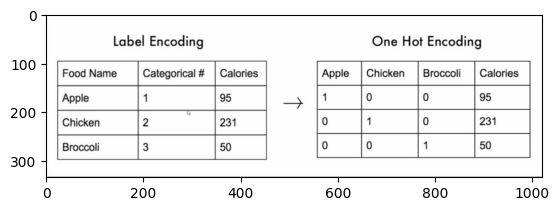

In [11]:
import matplotlib.pyplot as plt

img = plt.imread(r"C:\Users\anali\Desktop\ML Projects\Customer Churn Prediction\Label encoding and one hot.jpg")
plt.imshow(img)

In [12]:
# This is our original X data

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
# Perform one-hot encoding on DataFrame X
X = pd.get_dummies(X)

# Print the transformed DataFrame
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


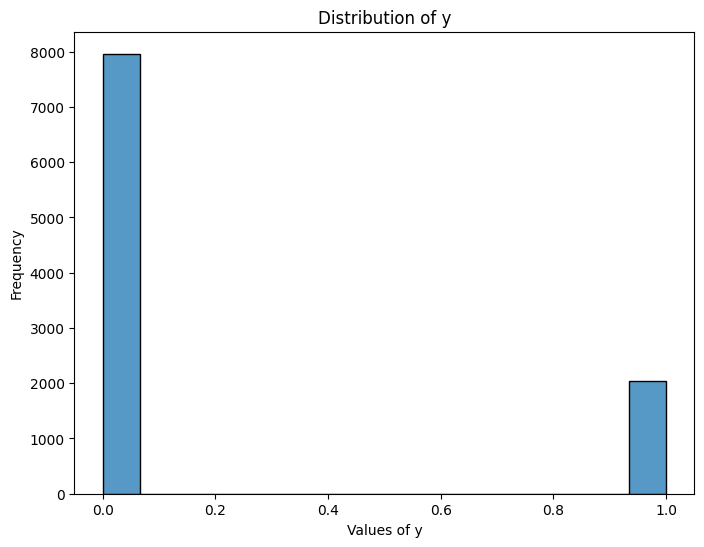

In [14]:
# lets check y data (target variable) is imbalance/bias or not

import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of y
plt.figure(figsize=(8, 6))
sns.histplot(data=y)
plt.xlabel('Values of y')
plt.ylabel('Frequency')
plt.title('Distribution of y')
plt.show()


In [15]:
# y is imbalance
# after transforming the data,we need to split our data into test and train
# use stratify as y data biased.
# so to train them,we need to stratified.stratify mean the train model will 
# take 0.85 from 0 and 1 respectively.

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15, 
                                                 stratify = y, 
                                                 random_state = 0) 

In [16]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5823,751,51,7,148074.79,1,1,0,146411.41,False,True,False,True,False
2217,666,35,2,104832.49,1,1,0,175015.12,False,False,True,False,True
6423,652,41,8,115144.68,1,1,0,188905.43,False,False,True,False,True
5783,624,71,7,0.00,2,1,1,108841.83,True,False,False,False,True
937,850,44,5,128605.32,1,0,1,171096.20,False,True,False,True,False


In [17]:
# Now lets standardized data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
X_train

array([[ 1.03682098,  1.15867808,  0.69679344, ..., -0.57191626,
         1.09379268, -1.09379268],
       [ 0.15827867, -0.37159838, -1.0351044 , ...,  1.74850772,
        -0.91425004,  0.91425004],
       [ 0.01357758,  0.20225529,  1.043173  , ...,  1.74850772,
        -0.91425004,  0.91425004],
       ...,
       [ 2.06006438,  0.20225529, -1.38148396, ..., -0.57191626,
        -0.91425004,  0.91425004],
       [ 0.80943356,  0.29789757,  0.69679344, ...,  1.74850772,
         1.09379268, -1.09379268],
       [ 0.95413465, -1.32802118,  0.35041387, ...,  1.74850772,
        -0.91425004,  0.91425004]])

#  3. Data modelling

Random Forest is a popular algorithm for customer churn prediction due to several reasons:

- **High accuracy**: Random Forest has shown to deliver high prediction accuracy in various classification tasks, including customer churn prediction. It combines the predictions of multiple decision trees, which reduces the risk of overfitting and improves generalization ability.

- **Handles complex relationships**: Random Forest can effectively capture nonlinear and complex relationships between features and the target variable. It can handle both numerical and categorical features, making it suitable for datasets with a mix of data types.

- **Feature importance**: Random Forest provides a measure of feature importance, allowing you to identify the key factors influencing customer churn. By analyzing feature importance, you can gain insights into the most influential features and prioritize them for decision-making or further analysis.

- **Handles imbalanced data**: Customer churn datasets often suffer from class imbalance, where the number of churned customers is much smaller compared to non-churned customers. Random Forest has built-in mechanisms to handle imbalanced data, such as balanced subsampling during tree construction and class weighting.

- **Robust to outliers and missing data**: Random Forest is robust to outliers and can handle missing data effectively by utilizing surrogate splits. This makes it suitable for datasets with incomplete or noisy data.

- **Parallelizable**: Random Forest can be easily parallelized, enabling faster training and prediction times, especially when dealing with large datasets.

- **Interpretability**: Although Random Forest is an ensemble of decision trees, it still provides interpretability to some extent. You can analyze individual decision trees and interpret the feature splits, which can help in understanding the model's predictions and building trust.


In [19]:
# here,we will use random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100) # n=100 is common practice,provide good balance 
                                                # between accuracy and computational efficiency
rf.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
y_pred = rf.predict(X_test)

**X_test**: This represents the test data, which consists of the input features (independent variables) for which you want to make predictions.

**rf**: This is the trained Random Forest classifier object that has been fitted on the training data. It has learned patterns and relationships from the training data to make predictions.

**rf.predict(X_test)**: This line of code calls the `predict()` method of the Random Forest classifier object (`rf`) and passes the test data (`X_test`) as the input. It returns the predicted target values for the test data.

**y_pred**: The output of `rf.predict(X_test)` is stored in the variable `y_pred`. It contains the predicted target values corresponding to the input test data.

By using `rf.predict(X_test)`, you can obtain the predicted target values for the test data based on the trained Random Forest model. These predictions can be further evaluated and compared with the actual target values (`y_test`) to assess the performance of the model and measure its accuracy in predicting the target variable.


#  4. Model evaluation

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(tabulate(cm, headers=["Actual 0", "Actual 1"], 
               showindex=["Predicted 0", "Predicted 1"], 
               tablefmt="grid"))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

# From the confusion matrix, we can interpret the following:

# There are 1152 instances where the predicted class is "0" 
# and the actual class is also "0" (true negatives).

# There are 42 instances where the predicted class is "1" 
# but the actual class is "0" (false positives).

# There are 179 instances where the predicted class is "0" 
# but the actual class is "1" (false negatives).

# There are 127 instances where the predicted class is "1" 
# and the actual class is also "1" (true positives).

Confusion Matrix:
+-------------+------------+------------+
|             |   Actual 0 |   Actual 1 |
+=============+============+============+
| Predicted 0 |       1157 |         37 |
+-------------+------------+------------+
| Predicted 1 |        179 |        127 |
+-------------+------------+------------+

Accuracy: 0.856


**cm = confusion_matrix(y_test, y_pred)**

The `confusion_matrix()` function is used to compute the confusion matrix based on the predicted target values (`y_pred`) and the actual target values (`y_test`). A confusion matrix is a table that represents the performance of a classification model. It shows the count of true positive, true negative, false positive, and false negative predictions. The `cm` variable stores the resulting confusion matrix.

**print(cm)**

This line of code prints the confusion matrix (`cm`). By printing the confusion matrix, you can visually inspect the performance of the classification model. It provides insights into the number of correct and incorrect predictions for each class, helping you evaluate the performance of the model.

**print(accuracy_score(y_test, y_pred))**

The `accuracy_score()` function calculates the accuracy of the classification model by comparing the predicted target values (`y_pred`) with the actual target values (`y_test`). It returns the accuracy as a floating-point number. The accuracy represents the proportion of correctly classified instances out of the total number of instances.

This line of code prints the accuracy score. It provides a single metric to evaluate the overall performance of the classification model. A higher accuracy score indicates better performance, while a lower accuracy score suggests the model is making more incorrect predictions.



In [22]:
### 85 percent is good,but try to find the best model.dont limit yourself

In [23]:
# save this model for further use using pickle
# uncomment this to save model

# import pickle

# pickle.dump(rf, open("Cust_Churn_Prediction.pkl", "wb"))

#  5. Model prediction

In [28]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load("Cust_Churn_Prediction.pkl")

# Create a DataFrame with random data for one person
input_df = pd.DataFrame({
    "CreditScore": 751,
    "Age": 51,
    "Tenure": 7,
    "Balance": 148074.9,
    "NumOfProducts": 1,
    "HasCrCard": 1,
    "IsActiveMember": 0,
    "EstimatedSalary": 146411.41,
    "Geography_France": False,
    "Geography_Germany": True,
    "Geography_Spain": False,
    "Gender_Female": True,
    "Gender_Male": False,
}, index=[0])

# Make predictions using the trained model
predictions = model.predict(input_df)
print(predictions)

# Check if the person exited
if (prediction == 0):
  print('The person not exit')
else:
  print('The person exited')

[0]
The person not exit


C:\Users\anali\anaconda3\envs\python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [25]:
# you can try which model perform better with this dataset,not only limited to random forest